## データのインポートや整理

In [1]:
#インポートする
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
% matplotlib inline

data = pd.read_csv('train.csv')

In [2]:
#欠損値の確認
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#目的変数と説明変数に分ける
y = data.loc[:, ['quality']].values
X = data.iloc[:,:11].values

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


固定酸性度、揮発酸性度、クエン酸、甘さ、塩化化合物、二酸化硫黄、総硫化物、濃度、pH、硫酸、アルコールのカラムがある

In [5]:
#正規化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [11]:
X_std[:5]

array([[-0.71216807,  0.99703955, -1.4893813 , -0.53195361, -0.28126568,
        -0.41735265, -0.38541836,  0.34163562,  1.36624252, -0.59231494,
        -0.86987119],
       [-0.48928565,  2.00329637, -1.4893813 ,  0.01623645,  0.16970466,
         0.97139982,  0.57961716, -0.19839865, -0.61716768,  0.08120568,
        -0.49742586],
       [-0.48928565,  1.33245849, -1.28809897, -0.21870215,  0.04671275,
        -0.02056623,  0.19945165, -0.09039179, -0.23328184, -0.08717447,
        -0.49742586],
       [ 1.40521485, -1.35089304,  1.32857129, -0.53195361, -0.30176434,
         0.17782698,  0.37491265,  0.44964247, -0.87309158, -0.4800615 ,
        -0.49742586],
       [-0.71216807,  0.99703955, -1.4893813 , -0.53195361, -0.28126568,
        -0.41735265, -0.38541836,  0.34163562,  1.36624252, -0.59231494,
        -0.86987119]])

## データの観察

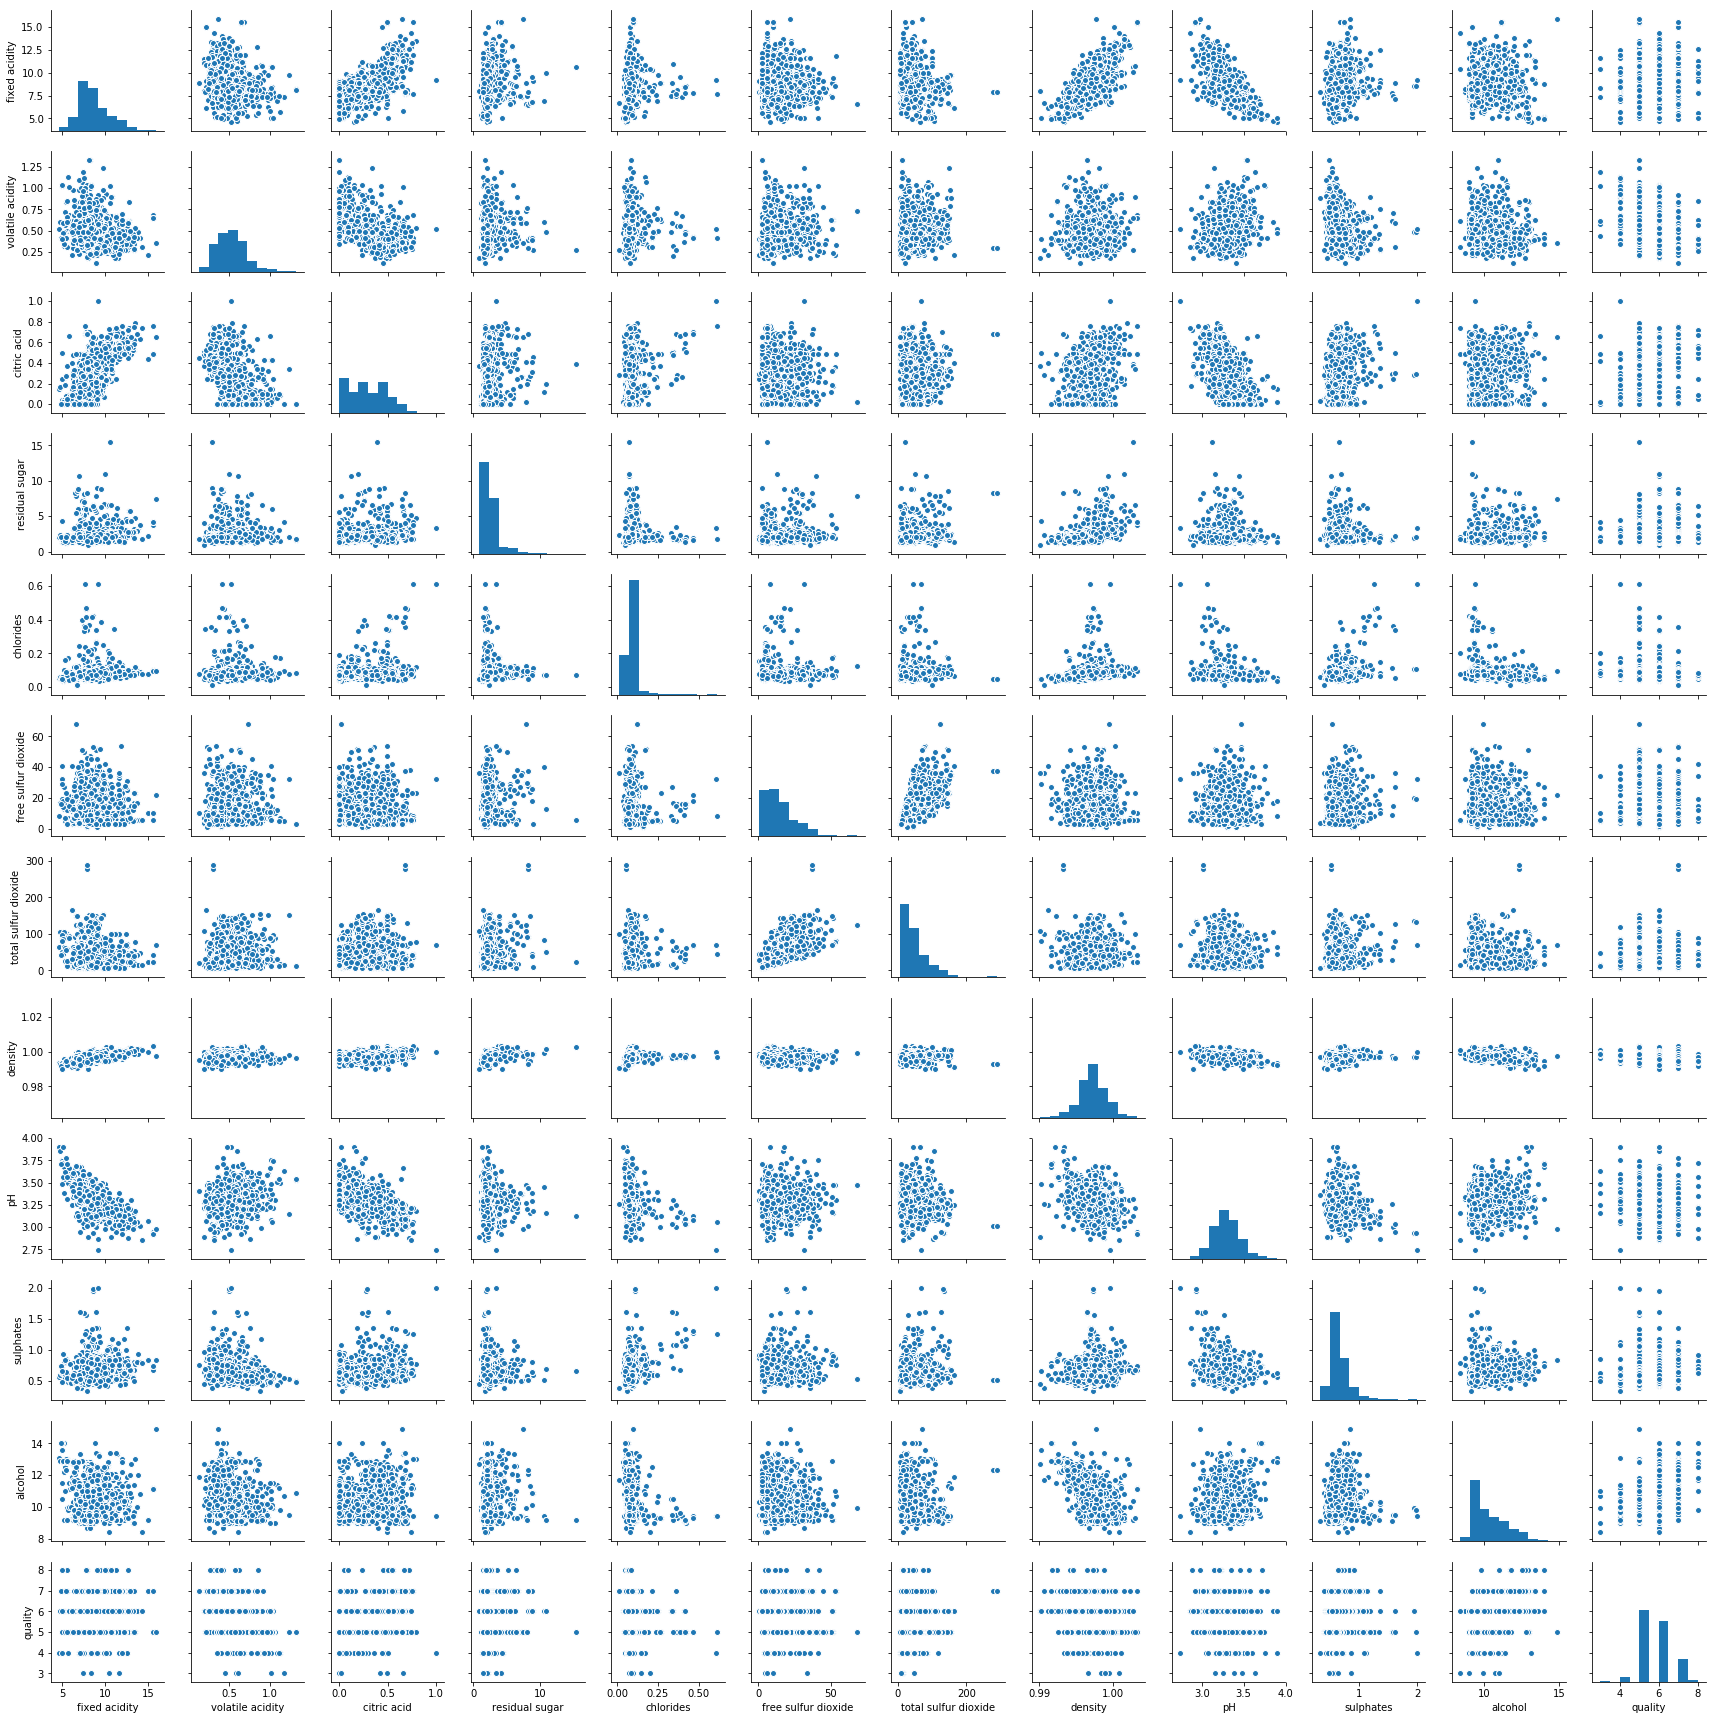

In [12]:
# 散布図行列を出力
import seaborn as sns
sns.pairplot(data, size=2.0)
plt.show()


-> citric acid（クエン酸）, residual sugar（甘さ）, chlorides（塩化化合物）, free sulfur dioxide（二酸化硫黄？）, total sulfur dioxide（総亜硫酸）に関してヒストグラムに偏りあり



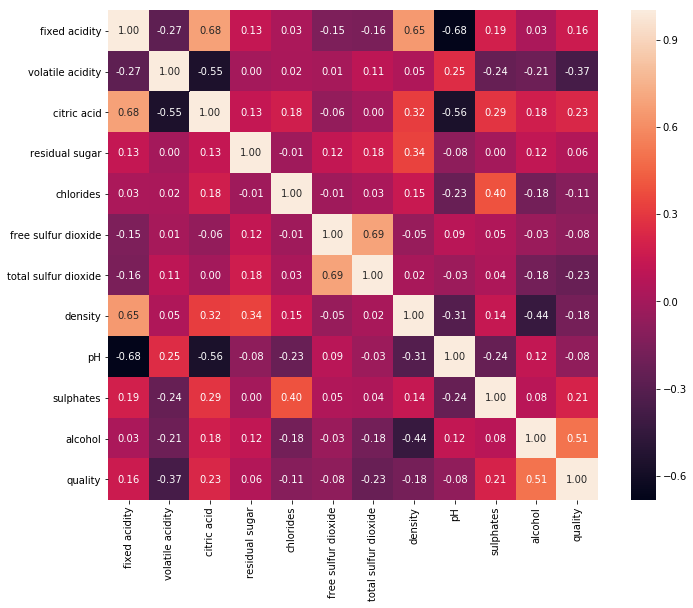

In [13]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(data.corr(), annot=True, square=True, fmt='.2f')
plt.show()

->qualityと強い相関のあるものは見つからない

->svmが良い？

一旦やってみる

In [14]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,8.678105,0.521649,0.295979,2.579267,0.089721,15.207328,47.179625,0.997167,3.296461,0.665532,10.334227,5.650581
std,1.795471,0.178961,0.198815,1.277500,0.048806,10.085498,34.210922,0.001853,0.156366,0.178248,1.074463,0.810473
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.400000,0.390000,0.120000,1.900000,0.072000,7.000000,22.000000,0.996200,3.190000,0.560000,9.500000,5.000000
50%,8.300000,0.510000,0.290000,2.250000,0.081000,13.000000,38.000000,0.997200,3.300000,0.620000,10.000000,6.000000
75%,9.700000,0.630000,0.470000,2.700000,0.092500,21.000000,63.000000,0.998200,3.390000,0.730000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


## モデルの作成

In [15]:
#グリッドサーチをする
param_grid = {'C': [0.1, 1.0, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

# データの分割方法を指定（層化）
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# GridSearchCVのインスタンスを生成
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train_1, X_test_1, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)
y_train = y_train.reshape(-1)

In [86]:
gs_svc_1 = GridSearchCV(SVC(), param_grid, cv=kf)

In [87]:
gs_svc_1.fit(X_train_1, y_train)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
gs_svc_1.best_params_

{'C': 10, 'gamma': 0.1}

In [89]:
#各スコアを出力
print('train score',gs_svc_1.best_score_)
print('test score', gs_svc_1.score(X_test_1, y_test))
print('train mse', mse(y_train, gs_svc_1.predict(X_train_1)))
print('test mse', mse(y_test, gs_svc_1.predict(X_test_1)))

train score 0.6513409961685823
test score 0.5803571428571429
train mse 0.17496807151979565
test mse 0.5327380952380952


In [5]:
y.std()

0.8101109945194145

-> 誤差が大きい

In [22]:
# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=11) # 主成分を11こまで取得
X_pca = pca.fit_transform(X_std)

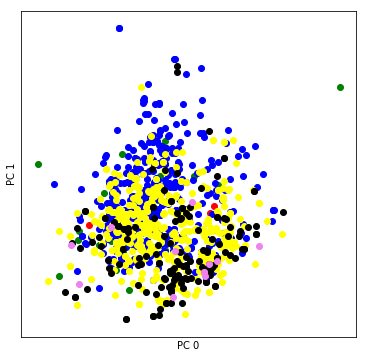

In [23]:
# 特徴抽出による可視化
# PC0とPC1について散布図を表示
plt.figure(figsize=(6, 6))
for target, color in zip(range(3, 9),  ['red', 'green', 'blue', 'yellow', 'black', 'violet']):
    plt.scatter(X_pca[data['quality']==target ,0], X_pca[data['quality']==target ,1], color=color)
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
# 寄与率を出力
# 各主成分の寄与率がarrayの形式で入っている
# [第一主成分の寄与率 第二主成分の寄与率 ...]
print(pca.explained_variance_ratio_)

[0.27638048 0.16845185 0.14149967 0.11931032 0.08865934 0.05918872
 0.05464245 0.04112299 0.02966907 0.01564039 0.00543473]


In [25]:
pca.explained_variance_ratio_.cumsum()

array([0.27638048, 0.44483233, 0.586332  , 0.70564231, 0.79430165,
       0.85349038, 0.90813282, 0.94925581, 0.97892488, 0.99456527,
       1.        ])

8割のところまで切り取って見る

In [26]:
X_pc_5 = X_pca[:, :5]

In [27]:
X_train_2, X_test_2, _, _ = train_test_split(X_pc_5, y, test_size=0.3, random_state=0)

In [28]:
# (モデルのインスタンス, 試したいパラメータの値, 分割方法)
gs_svc_2 = GridSearchCV(SVC(), param_grid, cv=kf)

In [29]:
gs_svc_2.fit(X_train_2, y_train)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
gs_svc_2.best_params_

{'C': 1.0, 'gamma': 1}

In [31]:
#各スコアを出力
print('train score',gs_svc_2.best_score_)
print('test score', gs_svc_2.score(X_test_2, y_test))
print('train mse', mse(y_train, gs_svc_2.predict(X_train_2)))
print('test mse', mse(y_test, gs_svc_2.predict(X_test_2)))

train score 0.6296296296296297
test score 0.5595238095238095
train mse 0.280970625798212
test mse 0.6041666666666666


scoreは下がったがmseに関しては改善した。

（→どういうことだ？）



分類より回帰の方がmseに関してはいい感じ？

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0, n_estimators=1000)
rfc_1.fit(X_train_1, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
#各スコアを出力
print('train score', rfc_1.score(X_train_1, y_train))
print('test score', rfc_1.score(X_test_1, y_test))
print('train mse', mse(y_train, rfc_1.predict(X_train_1)))
print('test mse', mse(y_test, rfc_1.predict(X_test_1)))

train score 1.0
test score 0.6220238095238095
train mse 0.0
test mse 0.4583333333333333


In [34]:
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=1000)

In [35]:
rfc_2.fit(X_train_2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
#各スコアを出力
print('train score', rfc_2.score(X_train_2, y_train))
print('test score', rfc_2.score(X_test_2, y_test))
print('train mse', mse(y_train, rfc_2.predict(X_train_2)))
print('test mse', mse(y_test, rfc_2.predict(X_test_2)))

train score 1.0
test score 0.5863095238095238
train mse 0.0
test mse 0.49107142857142855


## 正則化回帰でやって見る

In [37]:
from sklearn.linear_model import ElasticNet                 # ElasticNetのクラスを読み込み

In [38]:
param_grid_2 = {
    "alpha":[0.001,0.01, 0.1, 1, 10, 100, 1000],
    "l1_ratio": [0, 0,1, 0,3, 0,5, 0,7, 0.9, 1]
}

In [39]:
gs_en = GridSearchCV(ElasticNet(), param_grid_2, cv=kf)

In [40]:
gs_en.fit(X_train_1, y_train)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'l1_ratio': [0, 0, 1, 0, 3, 0, 5, 0, 7, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
#各スコアを出力
print('train score',gs_en.best_score_)
print('test score', gs_en.score(X_test_1, y_test))
print('train mse', mse(y_train, gs_en.predict(X_train_1)))
print('test mse', mse(y_test, gs_en.predict(X_test_1)))

train score 0.3292277615612278
test score 0.3959040333219947
train mse 0.40828939532465813
test mse 0.4326475640035974


In [42]:
gs_en.best_params_

{'alpha': 0.1, 'l1_ratio': 0}

In [43]:
gs_en.best_score_

0.3292277615612278

In [44]:
from sklearn.linear_model import Ridge                        # Ridge回帰のクラスを読み込み
model_ridges = []
for i in [0, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    model_ridges.append(Ridge(alpha=i))

In [45]:
best_mse = 10
for i, m in enumerate(model_ridges):
    m.fit(X_train_1, y_train)
    current_mse = mse(y_test, m.predict(X_test_1))
    if current_mse < best_mse:
        best_mse = current_mse
        best_model_idx = i
        best_model = m

In [46]:
print(best_mse)

0.4320146531982148


In [47]:
best_model.coef_

array([ 0.14654569, -0.19825055, -0.08905847,  0.04944856, -0.04331129,
        0.03335473, -0.13783916, -0.10044716,  0.00222251,  0.1227032 ,
        0.25977131])

In [48]:
best_model.alpha

10

In [49]:
best_mse = 10
for i, m in enumerate(model_ridges):
    m.fit(X_train_2, y_train)
    current_mse = mse(y_test, m.predict(X_test_2))
    if current_mse < best_mse:
        best_mse = current_mse
        best_model_idx = i
        best_model = m

In [50]:
best_mse

0.43789540249148057

分類より回帰の方がmseは良い

## PCAを観察

In [51]:
pca_data = pd.concat([pd.DataFrame(X_pc_5), pd.DataFrame(y)], axis=1)
pca_data. columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'target']

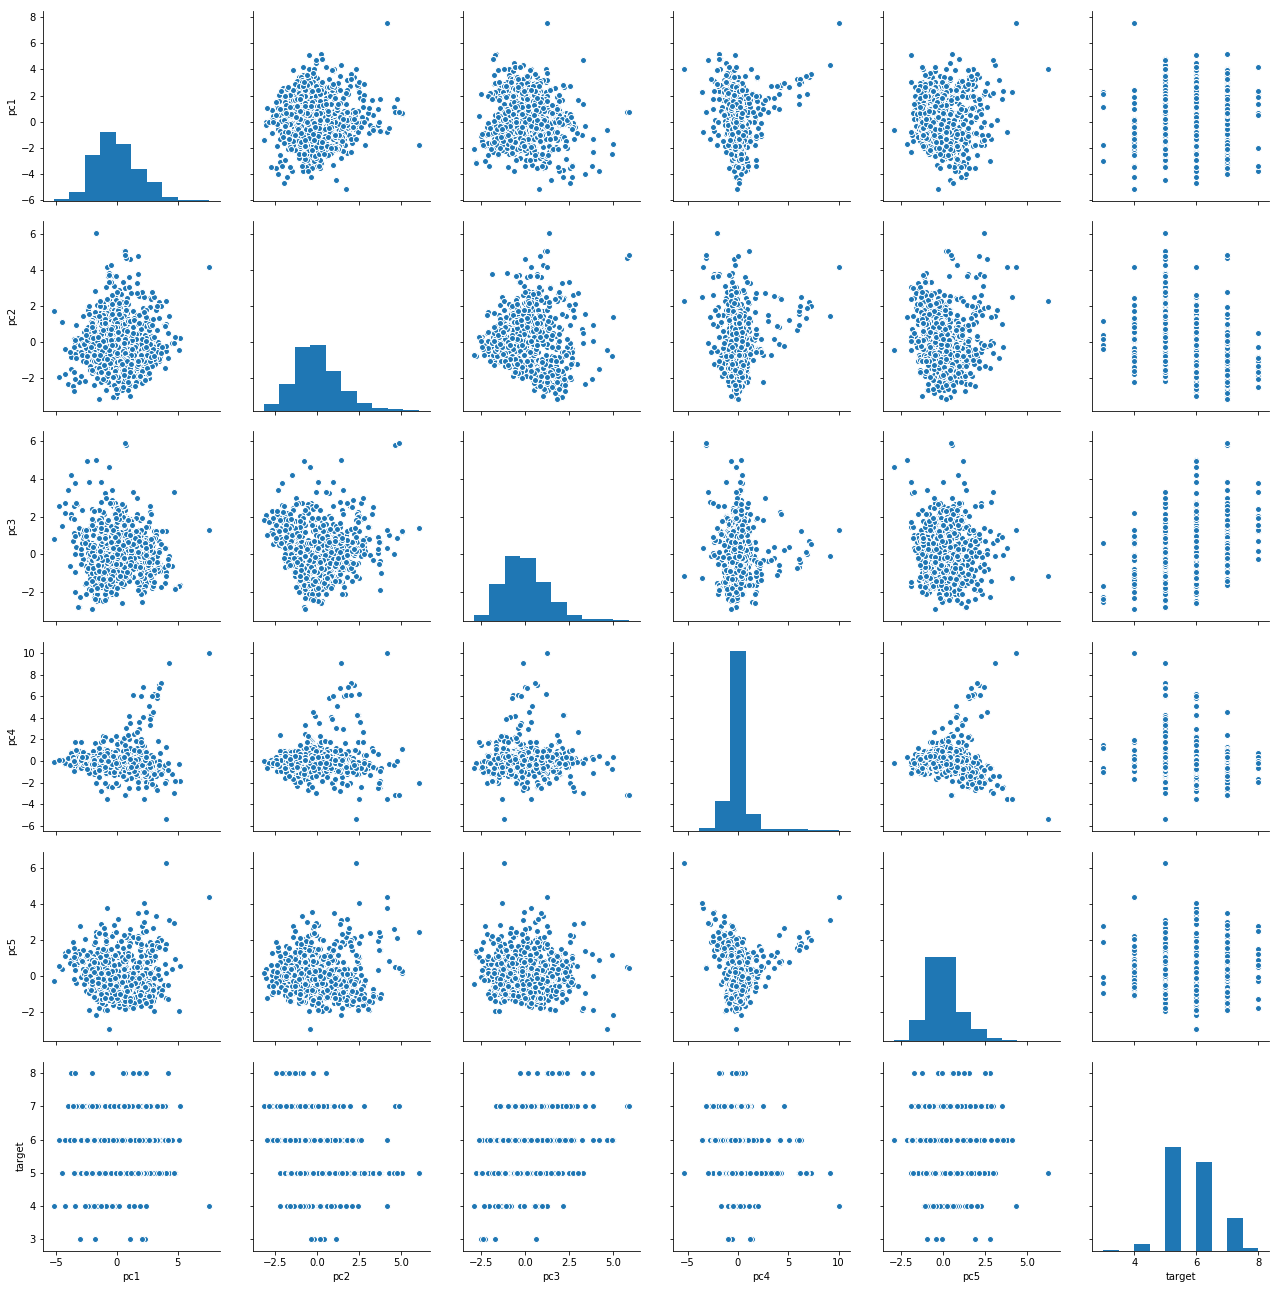

In [52]:
# 散布図行列を出力
import seaborn as sns
sns.pairplot(pca_data, size=3.0)
plt.show()

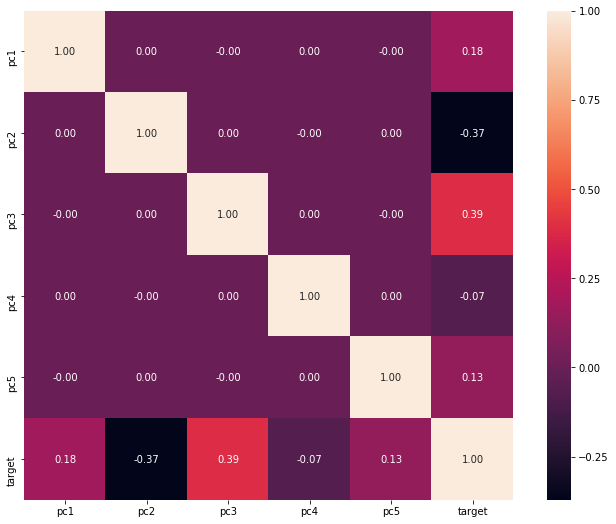

In [53]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(pca_data.corr(), annot=True, square=True, fmt='.2f')
plt.show()

そんなに相関ない

## ランダムフォレストの観察

In [54]:
importances_1 = rfc_1.feature_importances_
importances_1

array([0.07346171, 0.09709097, 0.07151979, 0.07355863, 0.08025426,
       0.06585436, 0.11654916, 0.08709365, 0.07717303, 0.11204962,
       0.14539482])

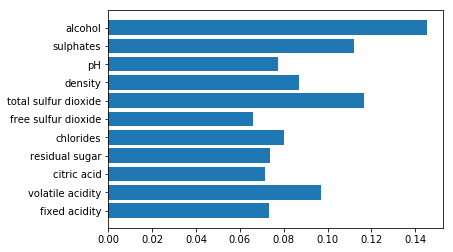

In [55]:
# 特徴量の重要度をグラフに出力
n_features = len(X[0])
# plt.figure(figsize=(12, 12))
plt.barh(range(n_features), importances_1 , align='center')
plt.yticks(np.arange(n_features), data.iloc[:, :11].columns)
plt.show()

In [56]:
importances_2 = rfc_2.feature_importances_
importances_2

array([0.18820197, 0.23348386, 0.22037376, 0.16330128, 0.19463913])

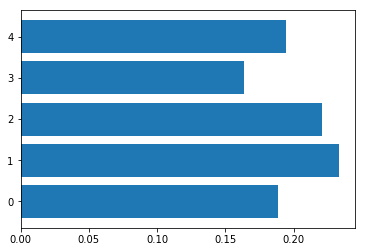

In [57]:
# 特徴量の重要度をグラフに出力
n_features = 5
# plt.figure(figsize=(12, 12))
plt.barh(range(n_features), importances_2 , align='center')
# plt.yticks(np.arange(n_features), data.iloc[:, :11].columns)
plt.show()

## ランダムフォレストのimportanceを参考に元データを加工

In [58]:
X_rfc = data.loc[:, ['alcohol', 'total sulfur dioxide', 'sulphates', 'volatile acidity']]

In [59]:
X_rfc.head()

,alcohol,total sulfur dioxide,sulphates,volatile acidity
0,9.4,34.0,0.56,0.70
1,9.8,67.0,0.68,0.88
2,9.8,54.0,0.65,0.76
3,9.8,60.0,0.58,0.28
4,9.4,34.0,0.56,0.70


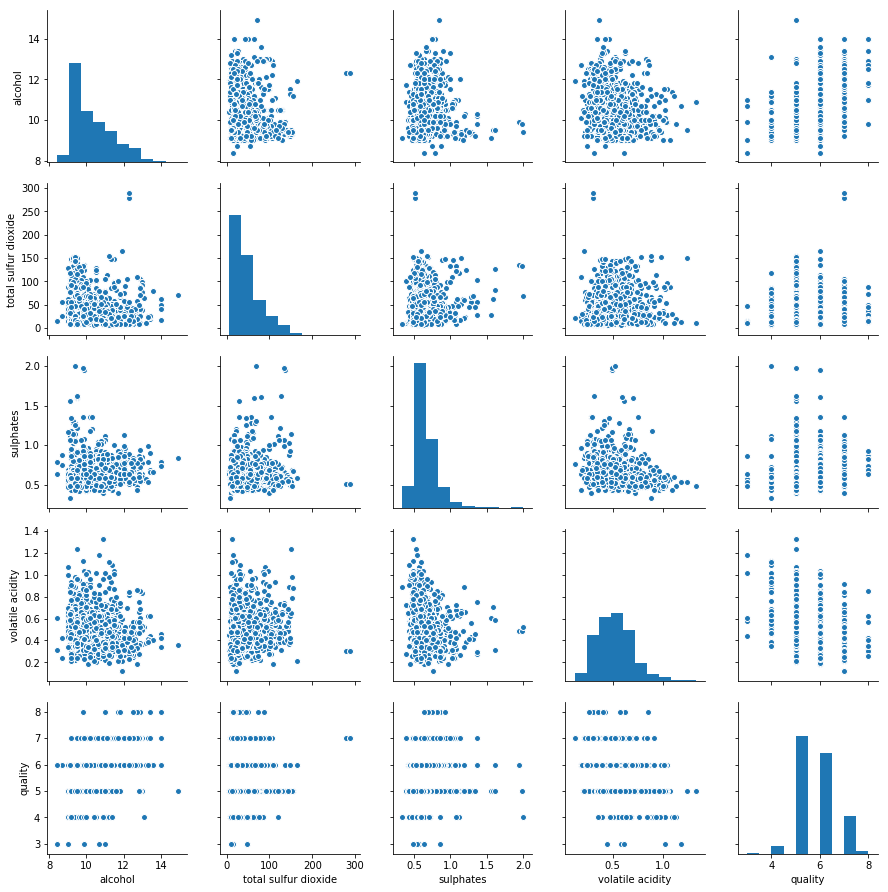

In [60]:
sns.pairplot(pd.concat([X_rfc, pd.DataFrame(y, columns=['quality'])], axis=1))
plt.show()

In [61]:
scaler_rfc = StandardScaler()
X_std_rfc = scaler_rfc.fit_transform(X_rfc)

In [62]:
X_train_rfc, X_test_rfc, _, _ = train_test_split(X_std_rfc, y, test_size=0.3, random_state=0)

In [63]:
model_ridges_rfc = []
for i in [0, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    model_ridges_rfc.append(Ridge(alpha=i))
best_mse_rfc = 10
for i, m in enumerate(model_ridges_rfc):
    m.fit(X_train_rfc, y_train)
    current_mse = mse(y_test, m.predict(X_test_rfc))
    if current_mse < best_mse:
        best_mse_rfc = current_mse
        best_model_rfc_idx = i
        best_model_rfc = m

In [64]:
best_mse_rfc

0.43771577026047437

In [65]:
pca_rfc = PCA(n_components=4)
X_pc_rfc = pca_rfc.fit_transform(X_std_rfc)

In [66]:
X_pc_rfc_train, X_pc_rfc_test, _, _ = train_test_split(X_pc_rfc, y, test_size=0.3, random_state=0)

In [67]:
model_ridges_pc_rfc = []
for i in [0, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    model_ridges_pc_rfc.append(Ridge(alpha=i))
best_mse_pc_rfc = 10
for i, m in enumerate(model_ridges_pc_rfc):
    m.fit(X_pc_rfc_train, y_train)
    current_mse = mse(y_test, m.predict(X_pc_rfc_test))
    if current_mse < best_mse_pc_rfc:
        best_mse_pc_rfc = current_mse
        best_model_pc_rfc_idx = i
        best_model_pc_rfc = m

In [68]:
best_mse_pc_rfc

0.43765905331973787

In [69]:
gs_rfc = GridSearchCV(ElasticNet(), param_grid_2, cv=kf)

In [70]:
gs_rfc.fit(X_pc_rfc_train, y_train)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'l1_ratio': [0, 0, 1, 0, 3, 0, 5, 0, 7, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
#各スコアを出力
print('train score',gs_rfc.best_score_)
print('test score', gs_rfc.score(X_pc_rfc_test, y_test))
print('train mse', mse(y_train, gs_rfc.predict(X_pc_rfc_train)))
print('test mse', mse(y_test, gs_rfc.predict(X_pc_rfc_test)))

train score 0.3282657916626679
test score 0.38423739012785263
train mse 0.41785952465249965
test mse 0.4410030986147647


ここまでやって一番mseの良いgs_enを採用した。

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train_1, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
mse(y_test, rfr.predict(X_test_1))

0.37161404166666673

In [75]:
mse(y_train, rfr.predict(X_train_1))

0.045679729246487874

In [76]:
rfr.score(X_train_1, y_train)

0.9273898378947368

In [77]:
rfr.score(X_test_1, y_test)

0.4811237542761734

In [78]:
0.36926382738095237 ** (1/2)

0.6076708215645642

In [79]:
y_test.std()

0.8462801674871544

In [80]:
0.43 ** (1/2)

0.6557438524302001

In [81]:
from sklearn.svm import SVR

In [91]:
param_grid_svr = {
    'gamma': [0, 0.001, 0.01, 0.1, 1, 10, 100],
    'C': [0.1, 1, 10, 100, 1000]
}

In [92]:
gs_svr = GridSearchCV(SVR(), param_grid_svr, cv=kf)

In [94]:
gs_svr.fit(X_train_2, y_train)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0, 0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [96]:
mse(y_test, gs_svr.predict(X_test_2))

0.43778623268749733

In [100]:
gs_svr.best_params_

{'C': 1, 'gamma': 0.1}

In [98]:
gs_svr.fit(X_pc_rfc_train, y_train)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0, 0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
mse(y_test, gs_svr.predict(X_pc_rfc_test))

0.4112082737285693

In [103]:
gs_svr.fit(X_train_1, y_train)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0, 0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
mse(y_test, gs_svr.predict(X_test_1))

0.42067351717759993

やっぱRandamForestRegressorの方がmseが良い